In [41]:
import pandas as pd

In [42]:
df=pd.read_excel(r"C:\Users\sasik\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [44]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [45]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [53]:
new=df.copy()

In [48]:
numerical_feature = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 4
Numerical feature are:
 {'MonthlyCharges', 'SeniorCitizen', 'tenure', 'TotalCharges'}


In [49]:
# Categorical feature
categorical_feature = {feature for feature in df.columns if df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 17
Categorical feature are:
 {'Partner', 'OnlineBackup', 'PaperlessBilling', 'StreamingMovies', 'customerID', 'gender', 'InternetService', 'Dependents', 'Contract', 'OnlineSecurity', 'Churn', 'DeviceProtection', 'TechSupport', 'MultipleLines', 'StreamingTV', 'PaymentMethod', 'PhoneService'}


In [50]:
# Importing neccessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from collections import Counter

In [51]:
encoder = LabelEncoder()
for feature in categorical_feature:
    df[feature] = encoder.fit_transform(df[feature])

In [52]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


<AxesSubplot:>

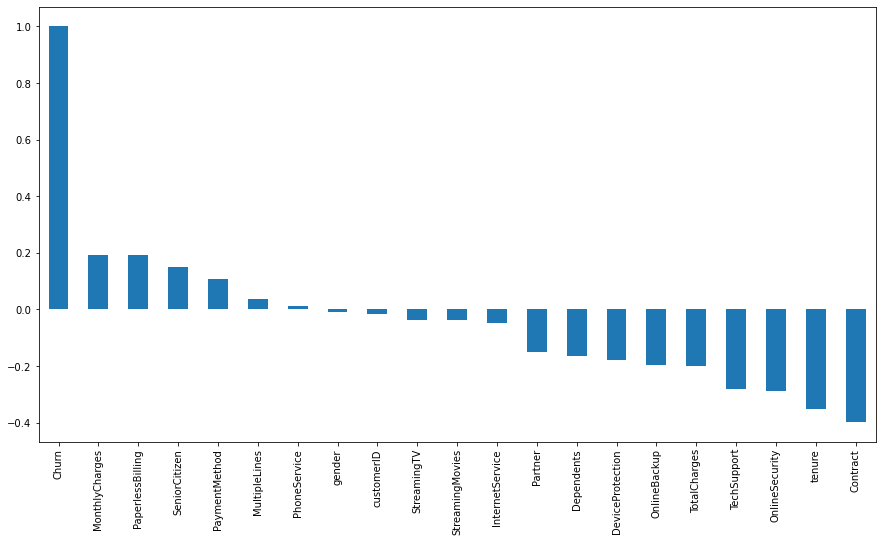

In [11]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

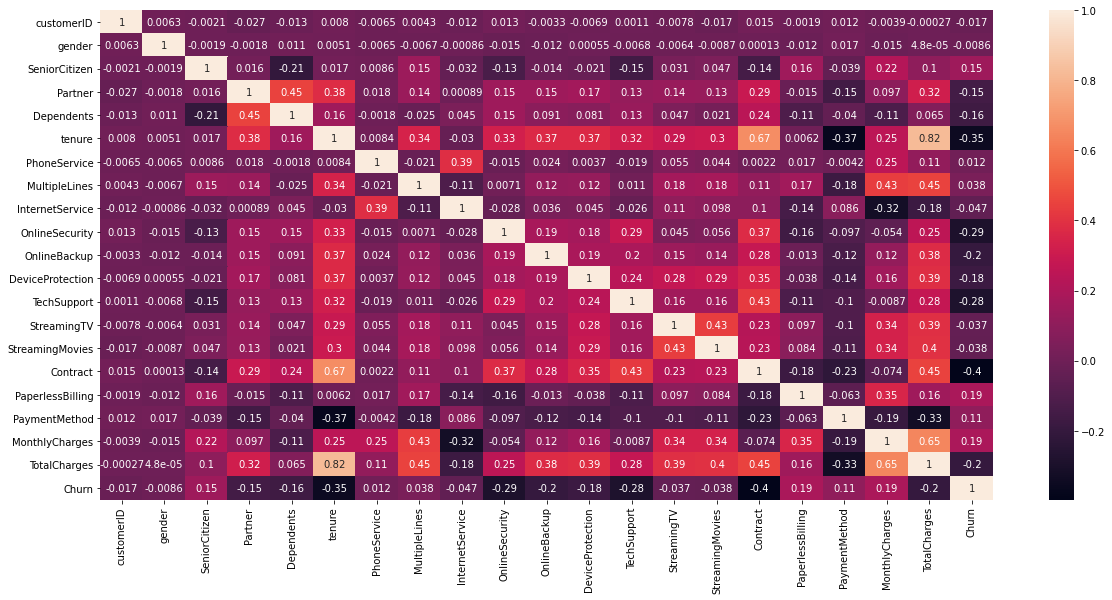

In [12]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(df.corr(), annot=True)

In [13]:
df.drop(columns=['customerID'], inplace=True)

In [14]:
# using minmaxscaler methods to scale down the value of features between 0 to 1
scaler = MinMaxScaler()
for feature in numerical_feature:
    df[[feature]] = scaler.fit_transform(df[[feature]])

In [15]:
# splitting dataset into dependent and independent feature
X = df.drop(columns='Churn')
y = df['Churn']

In [16]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.0,1,0,0.013889,0,1,0,0,2,0,0,0,0,0,1,2,0.115423,0.001275
1,1,0.0,0,0,0.472222,1,0,0,2,0,2,0,0,0,1,0,3,0.385075,0.215867
2,1,0.0,0,0,0.027778,1,0,0,2,2,0,0,0,0,0,1,3,0.354229,0.010310
3,1,0.0,0,0,0.625000,0,1,0,2,0,2,2,0,0,1,0,0,0.239303,0.210241
4,0,0.0,0,0,0.027778,1,0,1,0,0,0,0,0,0,0,1,2,0.521891,0.015330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.0,1,1,0.333333,1,2,0,2,0,2,2,2,2,1,1,3,0.662189,0.227521
7039,0,0.0,1,1,1.000000,1,2,1,0,2,2,0,2,2,1,1,1,0.845274,0.847461
7040,0,0.0,1,1,0.152778,0,1,0,2,0,0,0,0,0,0,1,2,0.112935,0.037809
7041,1,1.0,1,0,0.055556,1,2,1,0,0,0,0,0,0,0,1,3,0.558706,0.033210


In [17]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [18]:
# its an imbalance dataset
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [19]:
from imblearn.combine import SMOTEENN

In [20]:
df['TotalCharges'].mean()

0.26130861306737363

In [21]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
# selects the feature which has more correlation
selection = SelectKBest()
X = selection.fit_transform(X, y)

In [24]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
# its an imbalance dataset
y.value_counts()


0    5174
1    1869
Name: Churn, dtype: int64

In [26]:
from imblearn.combine import SMOTEENN

In [27]:
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 3886, 1: 1396})
The number of classes after fit Counter({0: 2295, 1: 2253})


In [28]:
# splitting the over sampling dataset 
X_train_sap, X_test_sap, y_train_sap, y_test_sap = train_test_split(X_train_st, y_train_st, test_size=0.25)

In [29]:
# logistic regression
Log_reg_sampling = LogisticRegression(C=10, max_iter=150)
Log_reg_sampling.fit(X_train_sap, y_train_sap)
Log_sampling_pred = Log_reg_sampling.predict(X_test_sap)

print(f'Accuracy score : {accuracy_score(Log_sampling_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Log_sampling_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Log_sampling_pred, y_test_sap)}')

Accuracy score : 0.9261213720316622
Confusion matrix :
 [[496  47]
 [ 37 557]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       543
           1       0.92      0.94      0.93       594

    accuracy                           0.93      1137
   macro avg       0.93      0.93      0.93      1137
weighted avg       0.93      0.93      0.93      1137



In [54]:
new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [55]:
X = new.iloc[:, :-1].values
y = new.iloc[:, -1].values

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[5.95000e+02 1.00000e+00 0.00000e+00 ... 3.00000e+00 6.91000e+01
  4.09690e+03]
 [2.50400e+03 1.00000e+00 0.00000e+00 ... 1.00000e+00 4.48500e+01
  4.35400e+02]
 [2.68200e+03 0.00000e+00 0.00000e+00 ... 3.00000e+00 1.88000e+01
  5.60000e+01]
 ...
 [6.26500e+03 1.00000e+00 0.00000e+00 ... 2.00000e+00 1.05700e+02
  2.97950e+03]
 [8.61000e+02 1.00000e+00 0.00000e+00 ... 3.00000e+00 5.44000e+01
  1.14100e+02]
 [4.12900e+03 0.00000e+00 0.00000e+00 ... 0.00000e+00 6.82500e+01
  1.11485e+03]]
[0 1 0 ... 1 1 0]
[[6.27600e+03 0.00000e+00 0.00000e+00 ... 0.00000e+00 7.98500e+01
  3.32075e+03]
 [1.14000e+02 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.02400e+02
  6.47185e+03]
 [1.10100e+03 0.00000e+00 0.00000e+00 ... 0.00000e+00 4.50000e+01
  5.24350e+02]
 ...
 [5.47800e+03 0.00000e+00 0.00000e+00 ... 0.00000e+00 2.47000e+01
  1.81055e+03]
 [6.01800e+03 0.00000e+00 1.00000e+00 ... 2.00000e+00 1.00800e+02
  1.30810e+03]
 [1.37900e+03 0.00000e+00 0.00000e+00 ... 3.00000e+00 1.00850e+02
  4.84735e+03]

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-1.44322604  0.99546654 -0.43885563 ...  1.32829493  0.14223435
   0.80706061]
 [-0.50166481  0.99546654 -0.43885563 ... -0.54840798 -0.66367128
  -0.8096003 ]
 [-0.41387125 -1.0045541  -0.43885563 ...  1.32829493 -1.52939671
  -0.97711666]
 ...
 [ 1.353344    0.99546654 -0.43885563 ...  0.38994348  1.35857028
   0.31369535]
 [-1.31202893  0.99546654 -0.43885563 ...  1.32829493 -0.34629401
  -0.95146379]
 [ 0.29982131 -1.0045541  -0.43885563 ... -1.48675943  0.11398611
  -0.50960297]]
[[ 1.35876944 -1.0045541  -0.43885563 ... -1.48675943  0.49949149
   0.46436735]
 [-1.68046594 -1.0045541   2.27865368 ... -1.48675943  1.24890064
   1.85567151]
 [-1.1936556  -1.0045541  -0.43885563 ... -1.48675943 -0.6586863
  -0.77032624]
 ...
 [ 0.9651781  -1.0045541  -0.43885563 ... -1.48675943 -1.3333207
  -0.20243077]
 [ 1.2315181  -1.0045541   2.27865368 ...  0.38994348  1.19572749
  -0.42427736]
 [-1.05653982 -1.0045541  -0.43885563 ...  1.32829493  1.19738915
   1.13840655]]


In [58]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [60]:
print(classifier.predict(sc.transform([[3962,1,0,0,0,34,1,0,0,2,2,2,0,0,0,1,0,3,56.95,1889.50]])))

[0]


In [61]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 0]]


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1062  265]
 [ 200  234]]


0.7359454855195912